<a href="https://colab.research.google.com/github/amr552/Deep-Learning/blob/main/fmd99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 10037 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 31, 31, 128)       3584      
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  (None, 6, 6, 256)         1024      
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 256)         0     

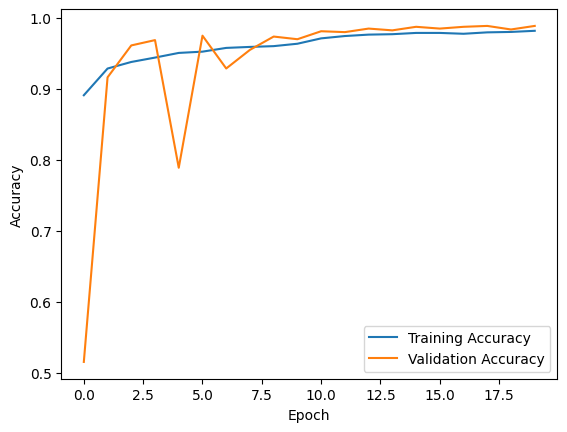

31/31 [==============================] - 4s 127ms/step - loss: 0.0348 - accuracy: 0.9899
Test Accuracy: 0.9899193644523621
diagram!!!!!!!!


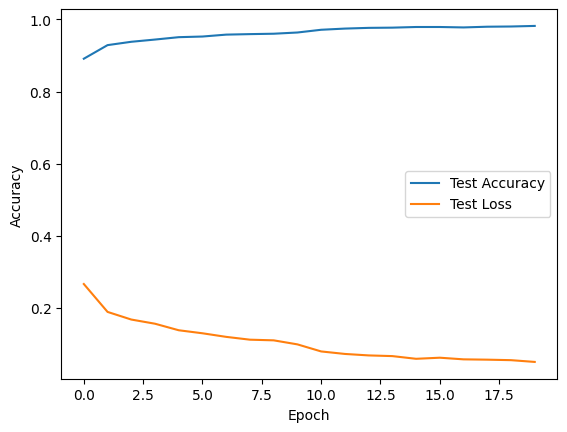

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping


# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/mask detection/Face Mask Dataset/Train',
    target_size=(64,64),
    batch_size=64,
    class_mode='binary')

validation_dataset = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/mask detection/Face Mask Dataset/Validation',
    target_size=(64,64),
    #batch_size=32,
    class_mode='binary')

test_dataset = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/mask detection/Face Mask Dataset/Test',
    target_size=(64,64),
    #batch_size=32,
    class_mode='binary')


# Learning Rate Scheduler
def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 10))

lr_scheduler = LearningRateScheduler(lr_schedule)

# Callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)
early_stopping = EarlyStopping(monitor="val_loss", patience=3)

# CNN Model
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=(64,64,3), activation='relu',strides=2))
model.add(Conv2D(256, (5,5), padding='same', activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=(3,3),strides=3,padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Conv2D(256, (3,3), input_shape=(64,64,3), activation='relu',strides=2))
model.add(Conv2D(512, (5,5), padding='same', activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=(3,3),strides=3,padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    train_dataset,
    #steps_per_epoch=train_dataset.samples // 32,
    epochs=20,
    validation_data=validation_dataset,
    #validation_steps=validation_dataset.samples // 32,

    callbacks=[checkpoint, early_stopping,lr_scheduler]
    )

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc}")


print('diagram!!!!!!!!')
# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Test Accuracy')
plt.plot(history.history['loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model.save('model_99.h5')

You are saving your model as an HDF5 file via `model.save()`. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
